In [1]:
using PyPlot
using JLD
using Dates
using Statistics: mean, var

mr  = include("../../Tools/Model_Reduction_Dev.jl")
at  = include("../../Tools/AnalysisToolbox.jl")
kmr = include("KSE_modredTools.jl")

server = startswith(pwd(), "/u5/jaredm") ? true : false
# When I want the standard lin et al. (2017) data.
sol_file = server ? "../../../data/KSE_Data/KSE_sol_linn.jld" :
   "Examples/KSE/Data/KSE_sol_linn.jld"

Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(.:1008836): Gdk-CRITICAL **: 14:29:52.219: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed

(.:1008836): Gdk-CRITICAL **: 14:29:52.223: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed


"../../../data/KSE_Data/KSE_sol_linn.jld"

In [2]:
# Load Old Data
@time Data = load(sol_file)
print("Data Loaded")
uu      = Data["dat_uu"];
vv      = Data["dat_vv"];
tt      = Data["dat_tt"];
obs_gap = Data["obs_gap"];
h       = Data["h"];

P       = Data["P"]
N       = Data["N"]

Δt = h*obs_gap

  2.691454 seconds (4.45 M allocations: 1.297 GiB, 7.85% gc time)
Data Loaded

0.1

## View data

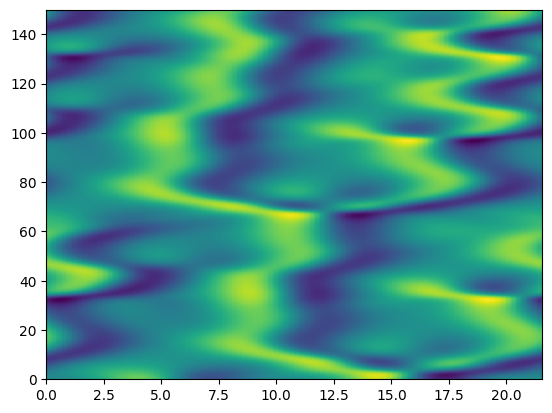

PyObject <matplotlib.image.AxesImage object at 0x7f3587a8dee0>

In [3]:
t_start = 0
t_stop = 150
ind_start = floor(Int,t_start/Δt)+1
ind_stop =floor(Int,t_stop/Δt)

H1 = imshow(uu[:,ind_start:ind_stop]', extent=[0,21.55,0,150], aspect="auto")

## Get tools (Psi, sig, pred)

In [4]:
Psi(x) = kmr.PSI(x; h, obs_gap, P, N)


Psi (generic function with 1 method)

In [5]:
sig = vv[2:6,2:end]

5×500000 Array{Complex{Float64},2}:
 -75.0373+105.738im  -76.3976+104.75im   …  -9.94987-43.2958im
 -414.239+79.4992im  -418.783+74.4633im       -221.8+49.0733im
   166.09+203.738im   167.297+196.795im     -57.7592+95.383im
 -28.9891+4.78464im   -19.914-1.62628im     -7.17876+57.3711im
 -31.5592+65.201im   -27.1491+67.5943im       17.782+60.4354im

In [13]:
pred = mr.get_pred(vv[2:6,1:end-1], Psi)

25×500000 Array{Complex{Float64},2}:
   -73.4911+106.602im      -75.0373+105.738im    …    -8.56738-41.4098im
     -409.3+84.7447im      -414.239+79.4992im         -224.247+44.949im
     164.86+210.838im        166.09+203.738im         -54.2359+103.867im
   -38.0952+11.1861im      -28.9891+4.78464im         -4.85775+53.5824im
   -35.8533+62.8729im      -31.5592+65.201im            15.438+61.6427im
    -88.328+109.159im      -89.7963+109.331im    …    -18.6775-48.9826im
   -403.954+62.0741im      -408.108+59.5112im          -232.67+41.8987im
    90.4457+145.04im        89.3492+140.378im         -57.2907+97.5206im
   -75.1652-75.081im       -65.5745-84.4612im         -16.6891+19.1894im
   -139.839+151.69im       -131.103+152.995im         -23.5946+46.0724im
  1.08328e6-2.46659e6im   1.32756e6-2.78936e6im  …    935653.0+2.25957e6im
  1.36683e6-561909.0im     1.2349e6-212174.0im        117509.0+2.06727e6im
 -6.92099e6-7.16525e6im  -7.14007e6-8.64184e6im     -1.47846e6+4.2603e6im
  1.48229e

In [16]:
pred_m = mean(pred,dims=2)

25×1 Array{Complex{Float64},2}:
   0.6811352179482479 + 3.3785186249467762im
  -1.2021750758912162 - 6.220540919805633im
   0.7940889513123769 + 0.32532332124825475im
    2.166630970247336 - 0.2593041970860091im
  -0.3206322704083912 + 0.5048348294741035im
   1.1055066837398406 + 3.4881719733774816im
  -0.9243101123372071 - 5.822535639228042im
    1.168764653182586 - 0.00624835727098711im
    2.909593598577761 + 0.19692956274432005im
 -0.40399425147335877 + 0.4138655607402009im
    82493.67271388102 - 68063.01955428309im
    208072.4658462004 - 121384.63852381085im
     43279.1150889172 - 428773.9253883877im
   -27565.46486060432 - 201861.38545724307im
  -225467.10361693022 - 107920.09406156099im
    6967.369073299137 + 48313.85701301923im
   -153696.6924046897 - 265678.82931096485im
   138134.62310633453 - 7643.991780466599im
   -333330.9115151447 + 105063.01007100813im
    47324.03018793378 - 15167.438034595369im
    89759.21523720834 + 167914.3924599492im
   233552.12088167763 - 135

## Autocovariances

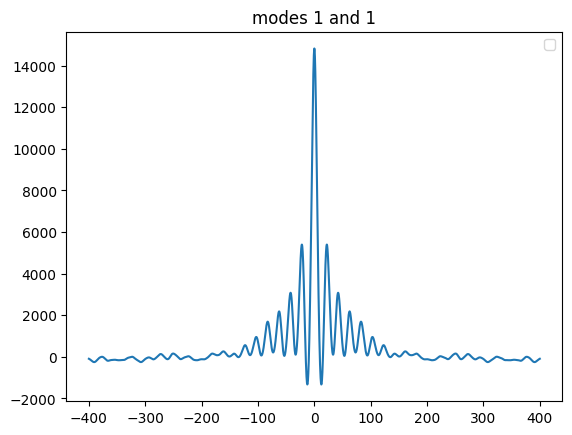

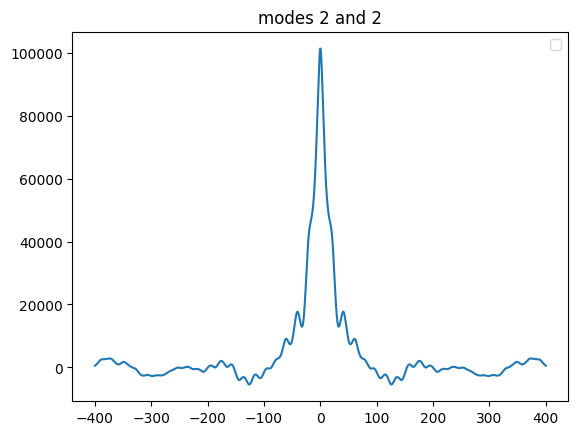

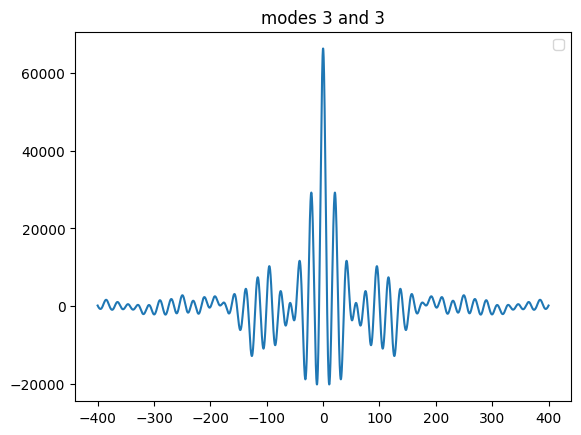

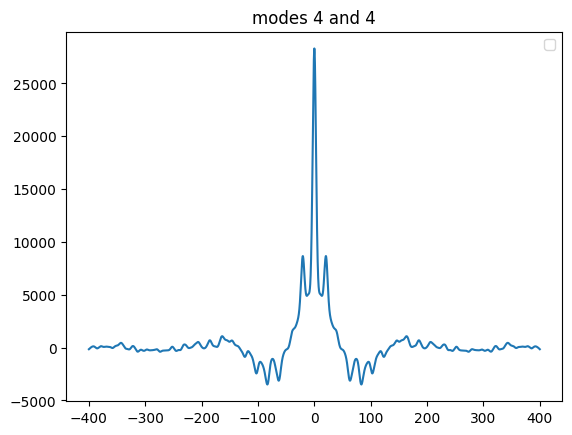

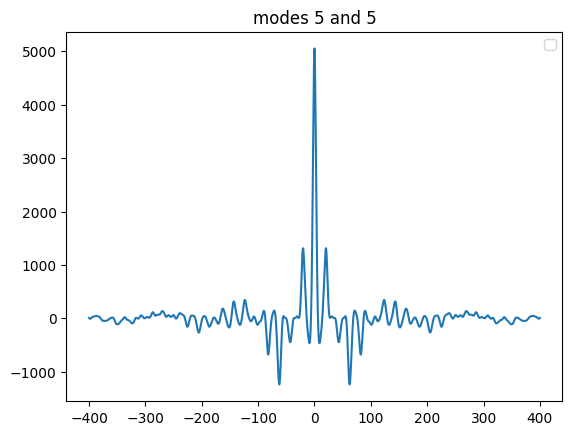

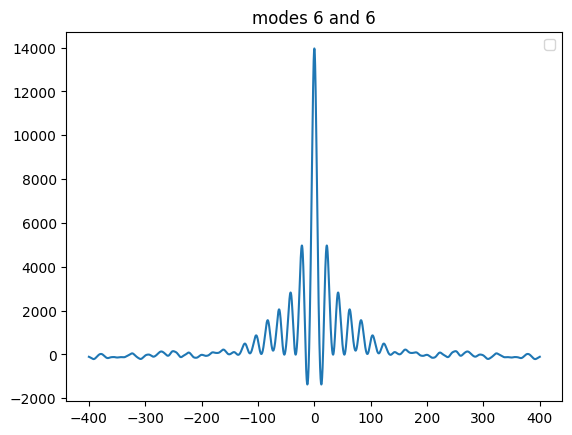

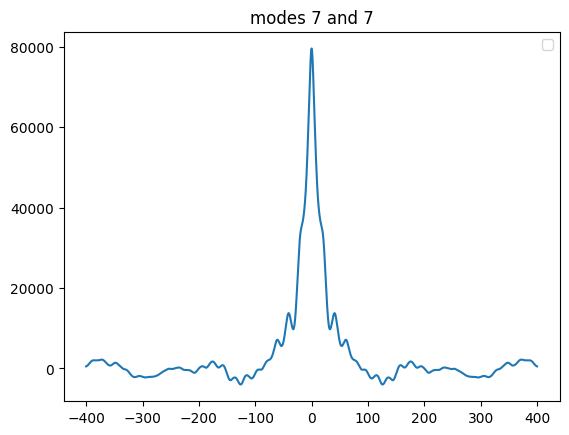

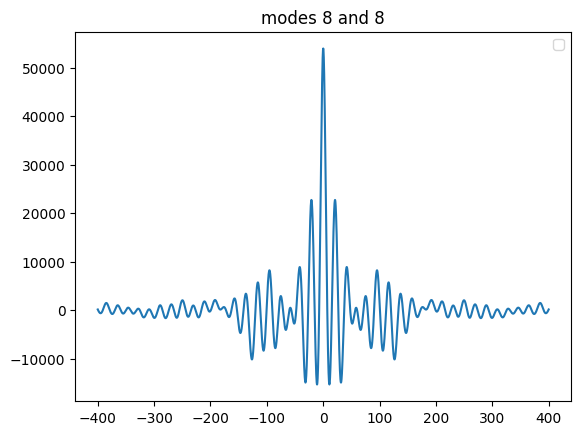

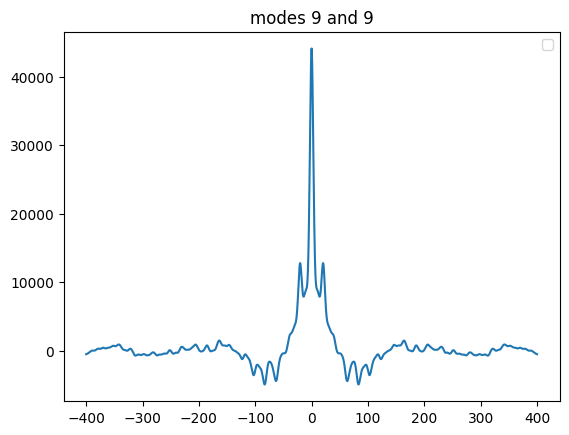

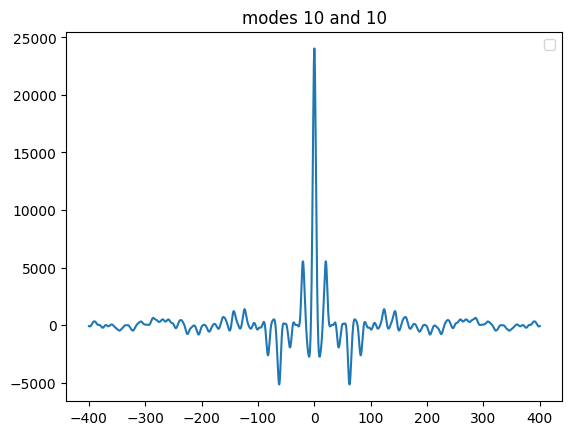

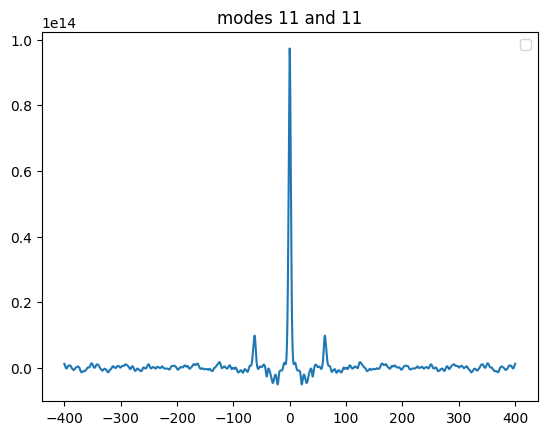

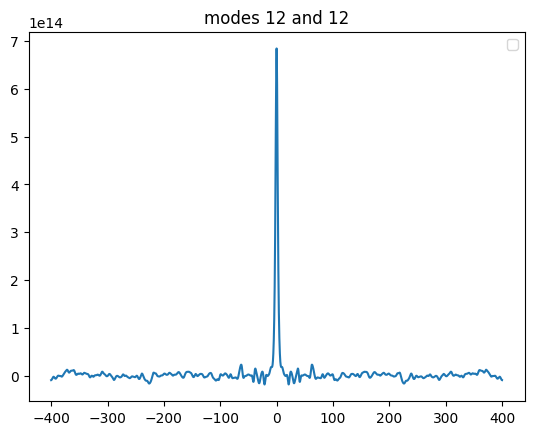

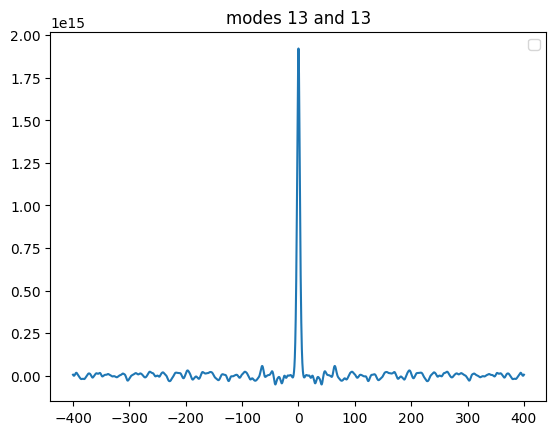

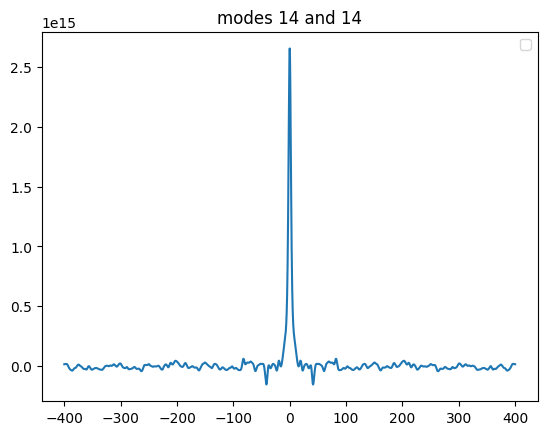

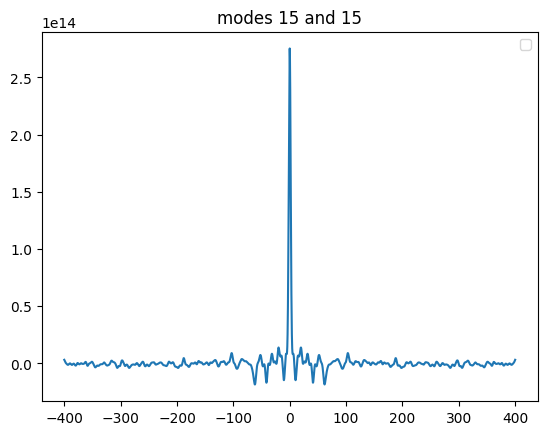

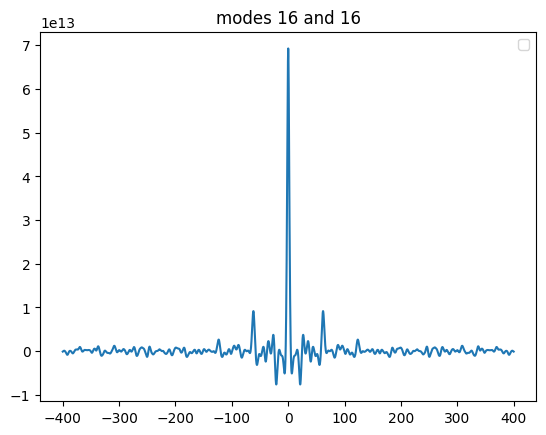

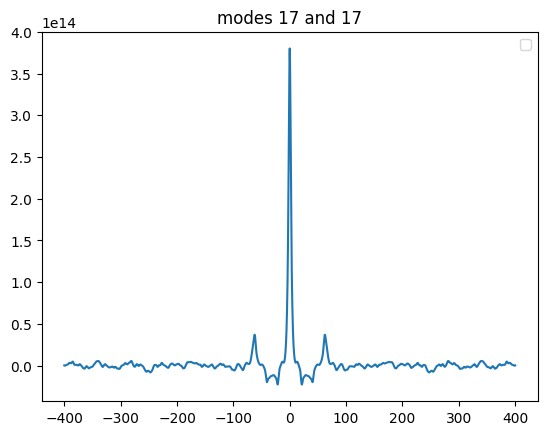

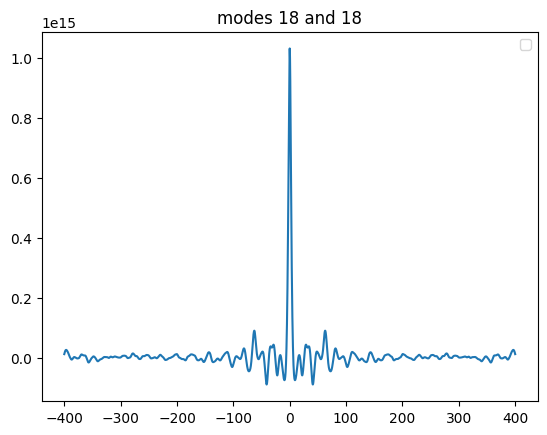

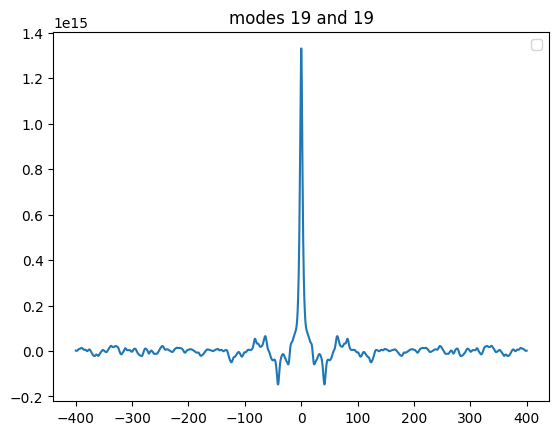

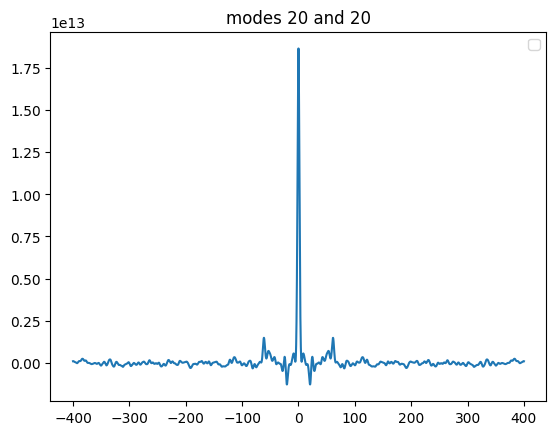

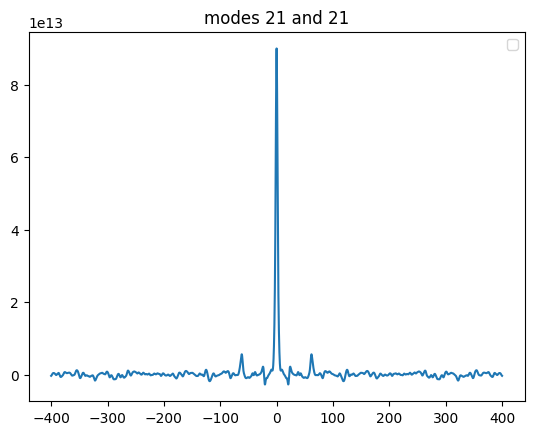

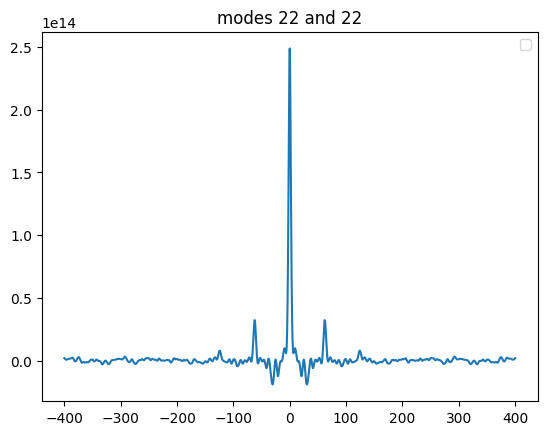

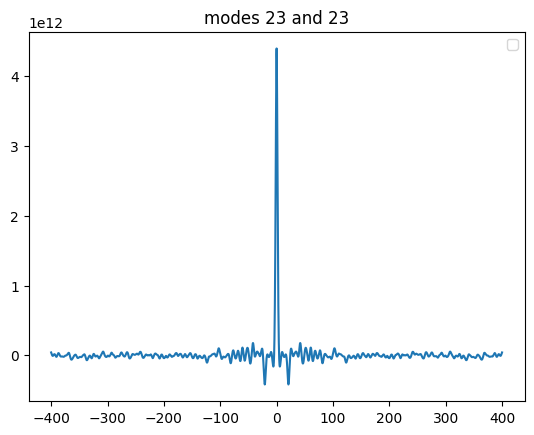

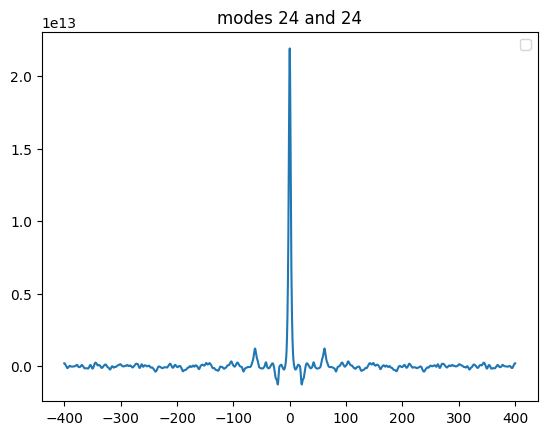

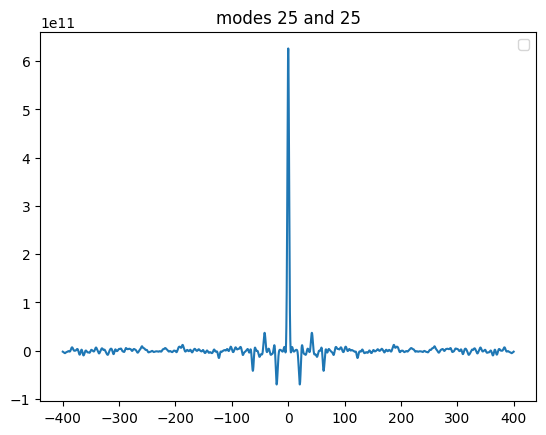

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/usr/local/lib/python3.8/dist-packages/numpy/cor

In [14]:
lags = -4000:4000
let plt = plot
    for m = 1:25
        figure()
        A = at.my_crosscov(pred[m,:],pred[m,:],lags)
        plt(Δt*lags,A)
        legend()
        title("predictors $m and $m")
    end
end

## Cross Covariances

In [ ]:
n = 5
lags = -10000:10000
let plt = plot
    for m = 1:25
        figure()
        A = at.my_crosscov(sig[n,:],pred[m,:],lags)
        plt(Δt*lags,A)
        legend()
        title("modes $n and $m")
    end
end

## Power Spectra and Cross Power Spectra 

In [40]:
L = 1000
Nex = 2^12

4096

In [ ]:
z_crossspect_sigpred_num_fft = at.z_crossspect_fft_old(sig, pred; L, Nex);

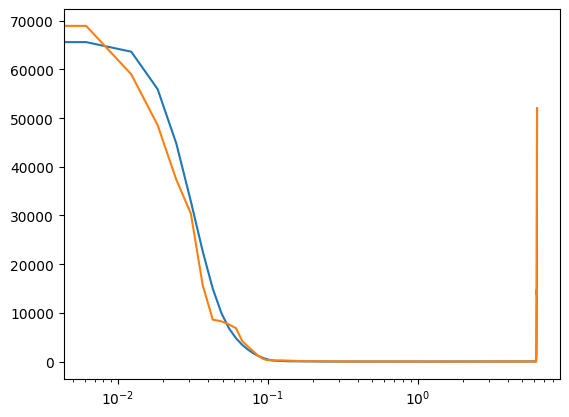

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7f8685f100>

In [30]:
L = 200
Nex = 2^10
n = 2
p = 5
nfft = Nex

Theta = 2π/Nex*(0:Nex-1)
points =  Nex

n = 1
m = 2
S_sigpred_dm = at.z_crossspect_dm(sig[n,:],pred[m,:]; L, Nex)
S_sigpred_sp = at.z_crossspect_scalar_ASP(sig[n,:],pred[m,:]; n,p, nfft )

semilogx(Theta[1:end÷points:end],S_sigpred_dm[1:end÷points:end])
semilogx(Theta[1:end÷points:end],S_sigpred_sp[1:end÷points:end])

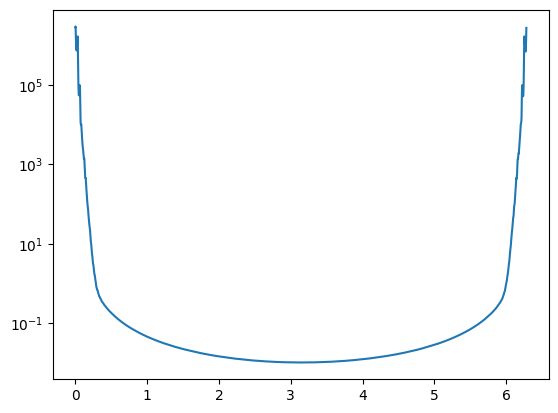

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff725741a30>

In [69]:
n = 1
m = 6
semilogx(Theta[1:end ÷ points:end],z_crossspect_sigpred_num_fft[n,m,1:end÷points:end])

In [ ]:
S_sigpred = z_crossspect_dm(sig[n,:],pred; L, Nex)
semilogy(Theta[1:end ÷ points:end],z_crossspect_sigpred_num_fft[n,m,1:end÷points:end])